
**ED4 - Processamento Monodático**


Aluno: Mauricio dos Santos de Jesus

1) Abrir a imagem lena.pgm nos formatos 'uint8' e ‘double’ e aplicar os seguintes
processamentos monadicos.

a. Brightness;

b. Contrast;

c. Negative;

d. Posterisation.

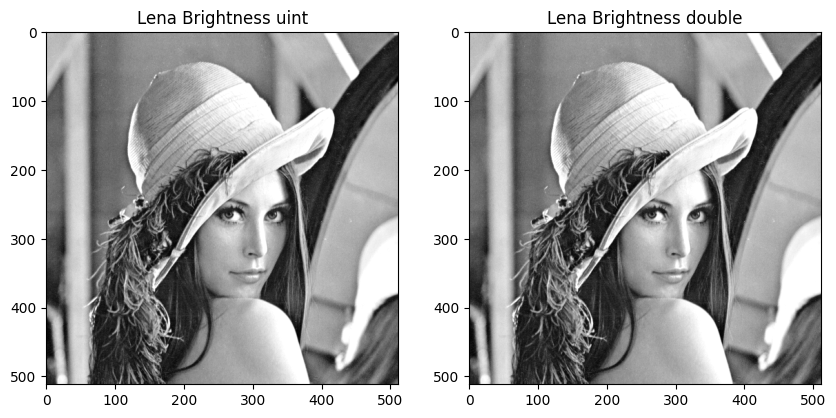

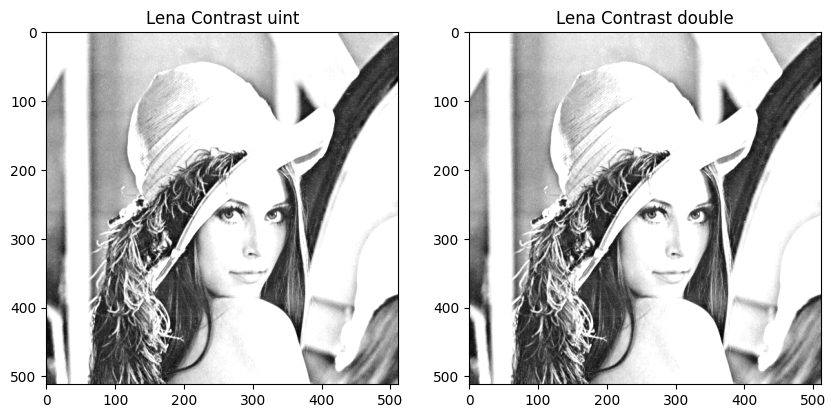

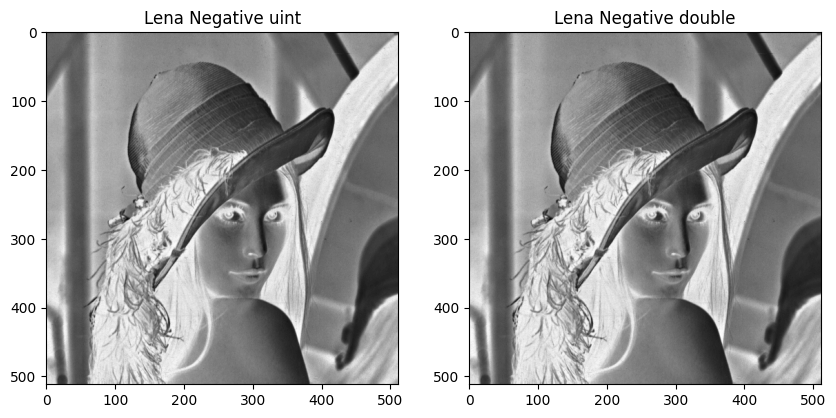

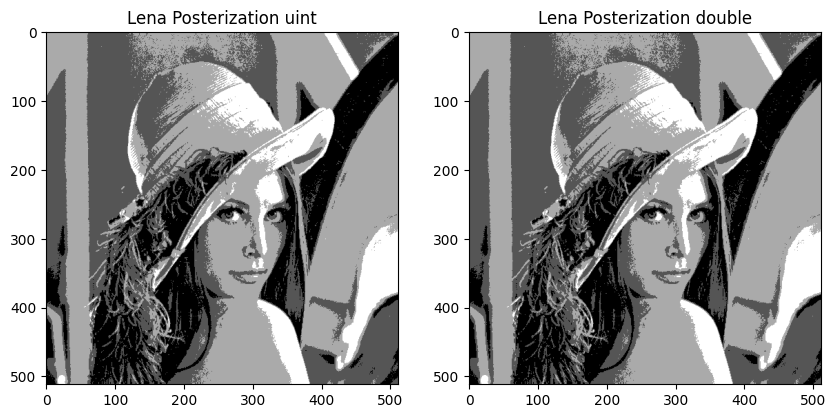

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import skimage

def get_images():
    lena = cv.imread("/content/lena.png")
    lena_int = cv.cvtColor(lena, cv.COLOR_BGR2GRAY)
    lena_double = skimage.img_as_float(lena_int)
    return lena_int, lena_double

def display_images(title1, image1, title2, image2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image1, cmap="gray")
    axs[0].set_title(title1)
    axs[1].imshow(image2, cmap="gray")
    axs[1].set_title(title2)
    plt.show()

def process_and_display(title, filename, image_processor):
    lena_int, lena_double = get_images()

    # Processamento da imagem
    lena_int, lena_double = image_processor(lena_int, lena_double)

    # Exibição da imagem processada
    display_images(f"{title} uint", lena_int, f"{title} double", lena_double)

    # Salva a imagem processada
    cv.imwrite(f"outputs/{filename}.png", lena_int)

# Brilho nas imagens Lena (int e double)
def brightness(image_int, image_double):
    image_int = cv.add(image_int, 50)
    image_double = cv.add(image_double, 0.2)
    image_double[image_double > 1] = 1
    return image_int, image_double

process_and_display("Lena Brightness", "lena_brightness", brightness)

# Contraste nas imagens Lena (int e double)
def contrast(image_int, image_double):
    image_int = cv.multiply(image_int, 1.8)
    image_double = cv.multiply(image_double, 1.8)
    image_double[image_double > 1] = 1
    return image_int, image_double

process_and_display("Lena Contrast", "lena_contrast", contrast)

# Negativo nas imagens Lena (int e double)
def negative(image_int, image_double):
    image_int = 255 - image_int
    image_double = 1 - image_double
    return image_int, image_double

process_and_display("Lena Negative", "lena_negative", negative)

# Posterização nas imagens Lena (int e double)
def posterization(image_int, image_double):
    image_int = (image_int // 64) * 64
    image_double = (image_double // 0.25) * 0.25
    return image_int, image_double

process_and_display("Lena Posterization", "lena_posterization", posterization)
